# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [9]:
#install spacy in the current conda environment
%pip install spacy


   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.7 MB 12.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.7 MB 11.4 MB/s eta 0:00:01
   ------------------------ --------------- 7.1/11.7 MB 11.5 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.7 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 11.7/11.7 MB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 MB 11.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 10.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ------ --------------------------------- 2.4/15.5 MB 11.2 MB/s eta 0:00:02
   ------------ --------------------------- 4.7/15.5 MB 11.4 MB/s eta 0:00:01
   ------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------- -------------------------------- 2.4/12.8 MB 12.2 MB/s eta 0:00:01
     -------------- ------------------------- 4.7/12.8 MB 11.9 MB/s eta 0:00:01
     ---------------------- ----------------- 7.1/12.8 MB 11.8 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 11.7 MB/s eta 0:00:01
     ----------------------------------- --- 11.8/12.8 MB 11.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 11.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt
import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [3]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [4]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [5]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [6]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [7]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [8]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [9]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [10]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 221217 stored elements and shape (8339, 15289)>

In [11]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

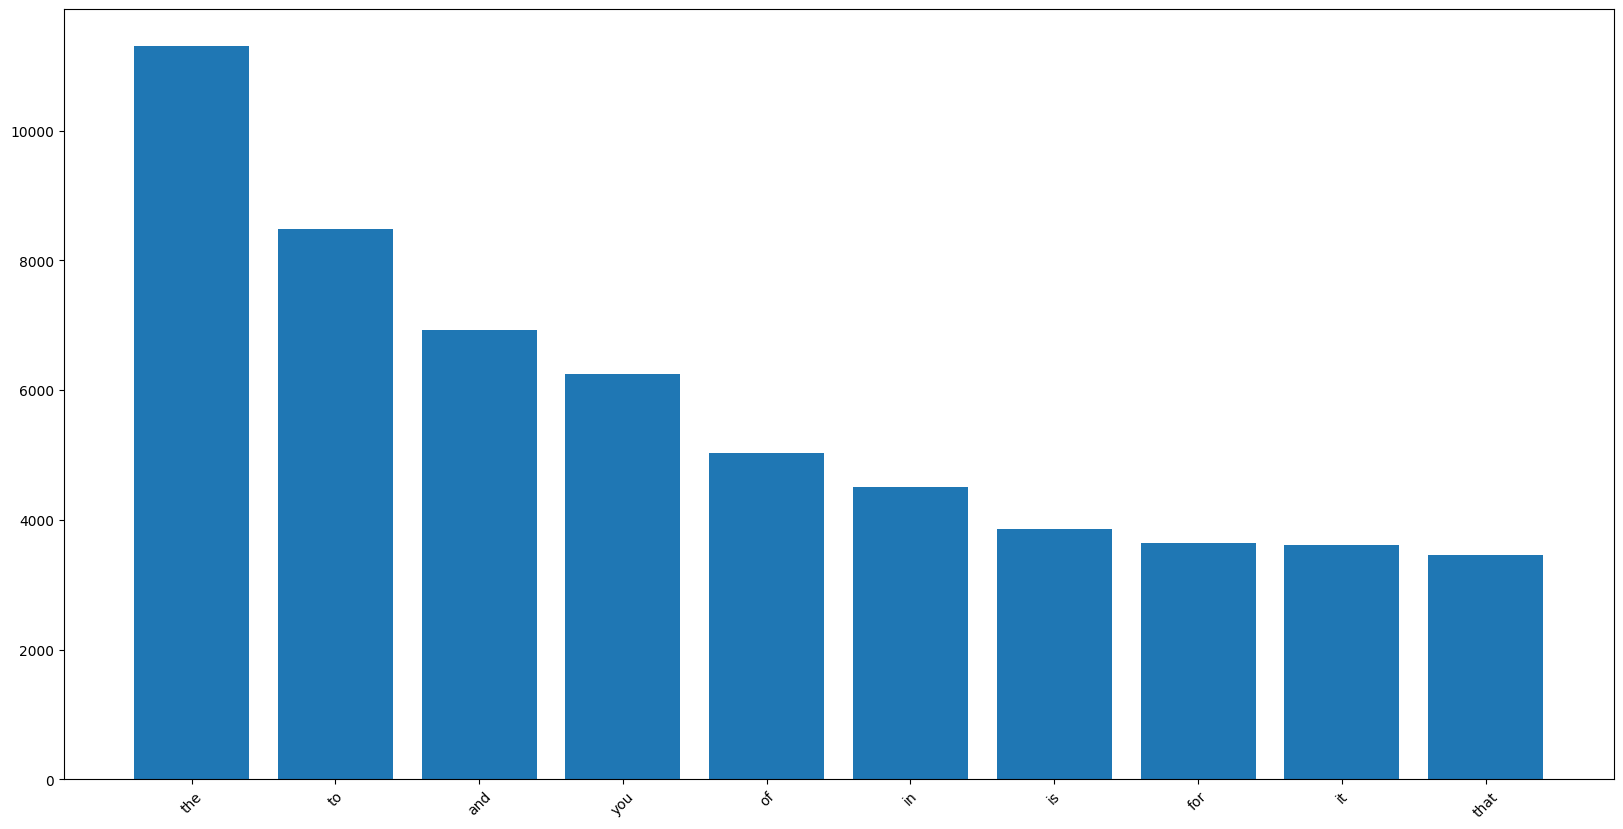

In [13]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: The most frequent occurrences of words in the Plot are prepositions and pronouns, which is not helpful for the study. This is because these are common words that occur in the normal course of events and have no individual meaning.

#### Lemmatization and stopword removal

In [14]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [16]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [17]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [18]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 126833 stored elements and shape (8339, 8637)>

In [19]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [20]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

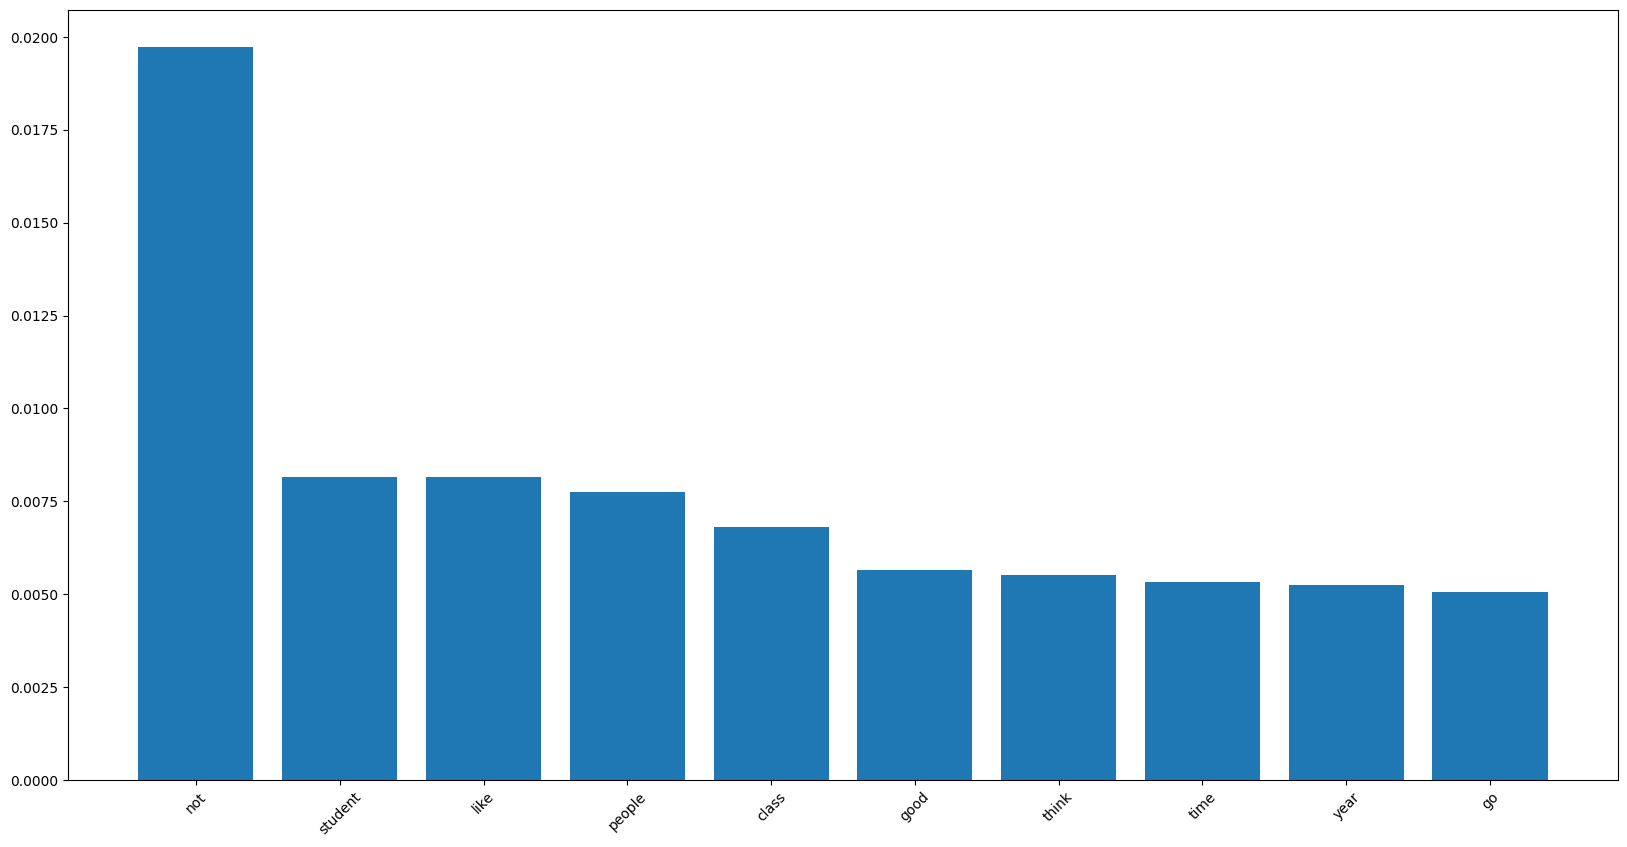

In [21]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [22]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [23]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

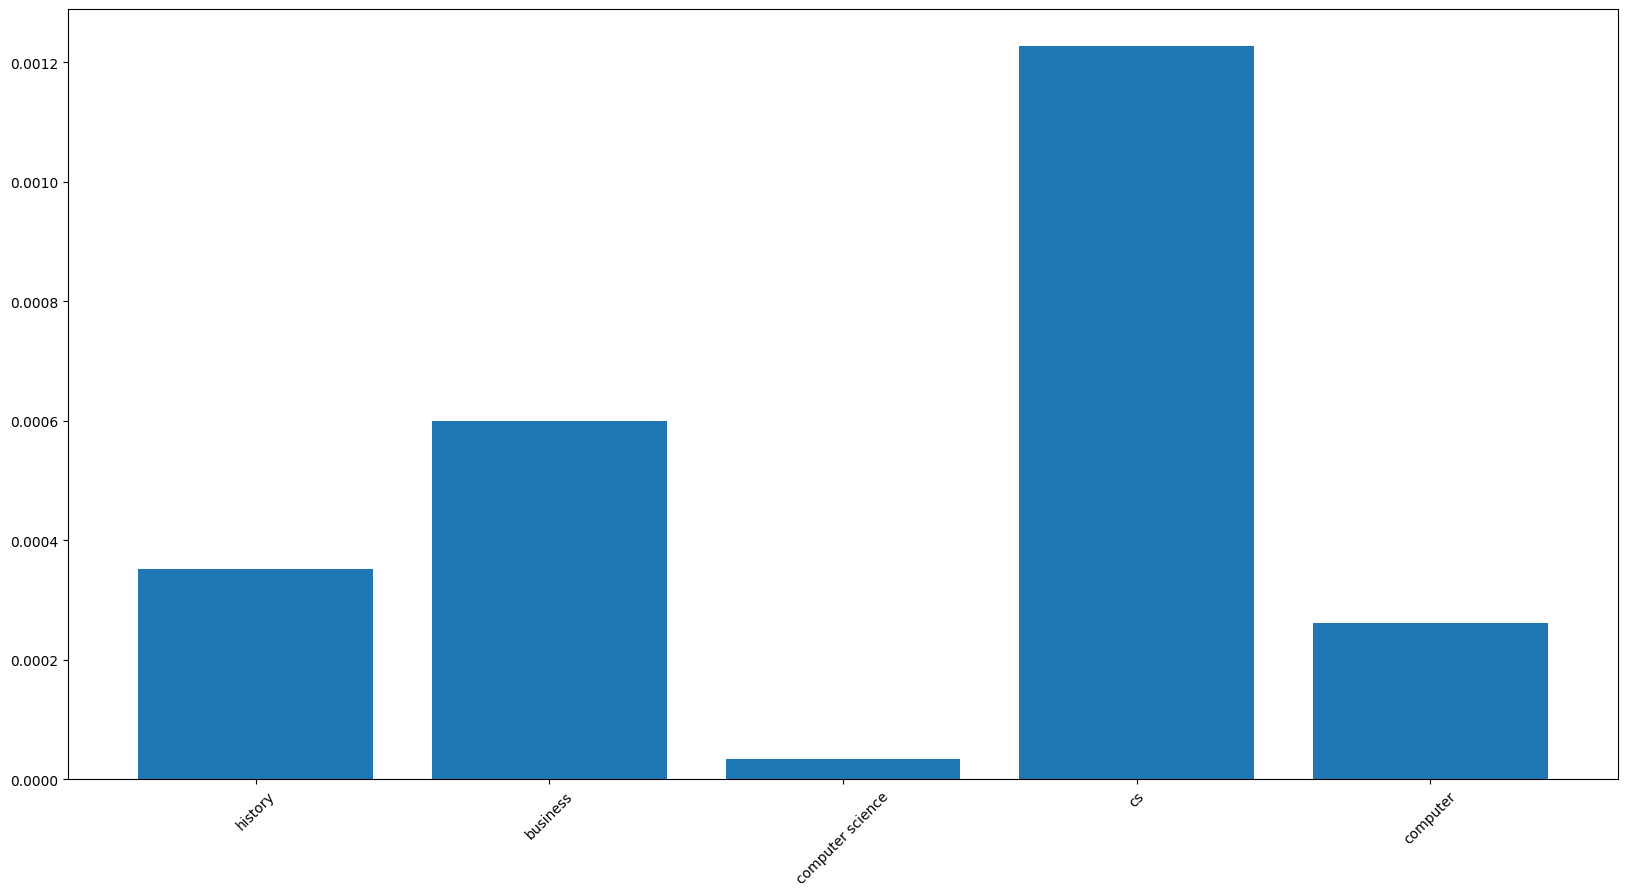

In [24]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [ ]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

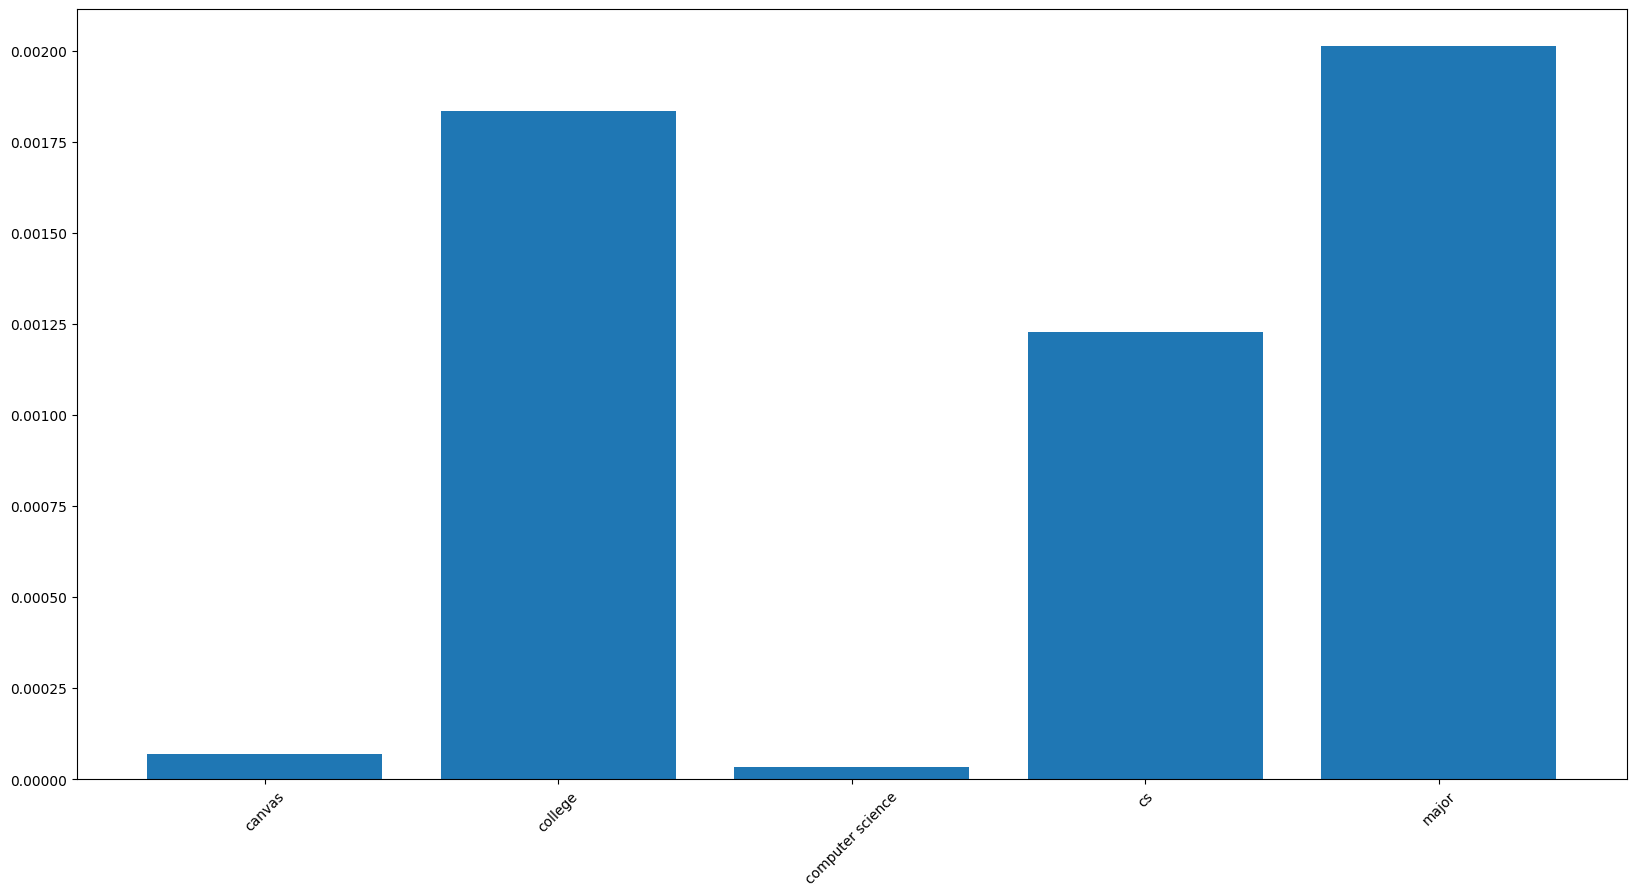

In [41]:
plot_list=word_counts[["canvas", "college", "computer science", "cs", "major"]]
plot_list
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [40]:
uiuc=pd.read_csv("uiuc.csv")
uiuc['cleaned_text'] = uiuc['text'].apply(clean)
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_wordsuiuc = vectorizer.fit_transform(uiuc['lemmatized_text'])


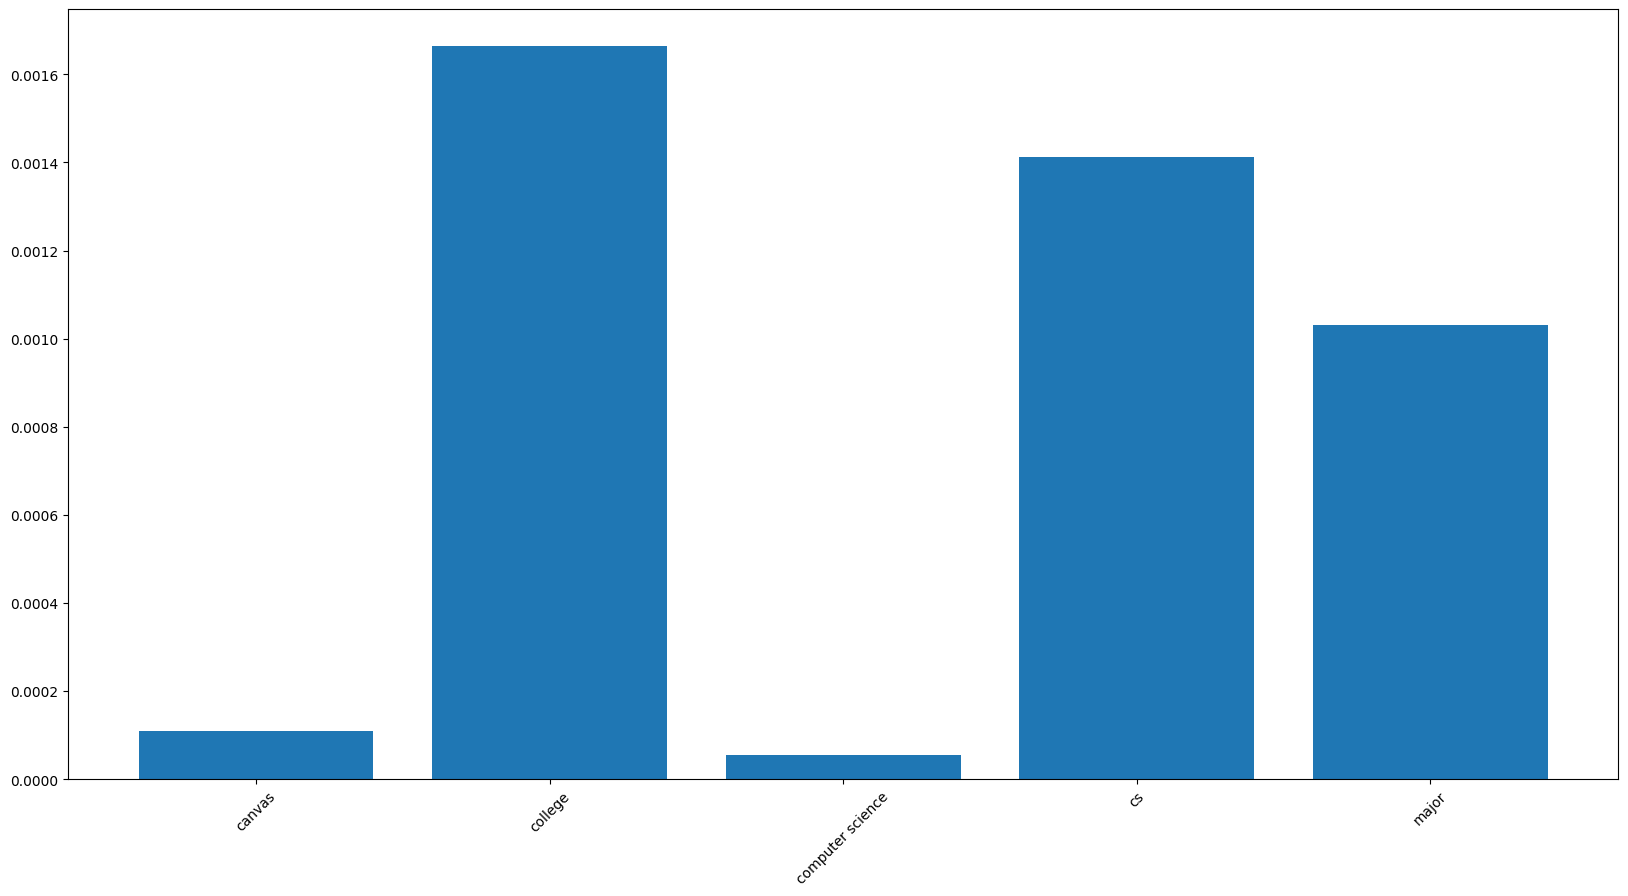

In [42]:
bow_df = pd.DataFrame(bag_of_wordsuiuc.toarray(), columns=vectorizer.get_feature_names_out())
word_countsuiuc = bow_df.sum()
word_countsuiuc = word_countsuiuc.sort_values(ascending=False)
word_countsuiuc = word_countsuiuc / word_countsuiuc.sum()
plot_list=word_countsuiuc[["canvas", "college", "computer science", "cs", "major"]]
plot_list
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

UIUC and Umich have mostly the same images in both charts' shape, but there are some differences in the discussion of the word Major, which is much more likely to occur in Umich's chart. What I found surprising was that I thought there would be a bit more discussion of CS in UIUC. The difference in the y-axis range, the bars appear taller in the Umich plot, especially for the categories "college", "CS", and "major".

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [43]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [57]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text,lemmatized_text
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...,professor lecture go to learn stuff ourself re...
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...,find helpful lecture slide embed mistake make ...
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...,try email university housing request access
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...,purchase illini cash add nonresident meal plan...
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...,thank suggestion not occur
...,...,...,...,...,...,...,...,...,...
1743,1743,2024-08-27 23:13:02,202,Its pretty crazy,Ill-Branch3614,0,0,its pretty crazy,pretty crazy
3226,3226,2024-08-21 03:20:09,1,"There is a thing called “Michigan time” here, ...",peaches0444,10,0,there is a thing called michigan time here ess...,thing call michigan time essentially class end...
6954,6954,2024-07-13 16:14:36,10,Did you apply housing for the transfer dorm? I...,Series710,1,0,did you apply housing for the transfer dorm i ...,apply housing transfer dorm think transfer stu...
4661,4661,2024-08-07 21:55:27,12,if you read the first sentence you would get t...,SpacingTFOut,7,0,if you read the first sentence you would get t...,read sentence gist rest specific not need tldr...


In [54]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_wordsall = vectorizer.fit_transform(data['lemmatized_text'])
bag_of_wordsall

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 122897 stored elements and shape (9450, 8300)>

In [63]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(bag_of_wordsall, data['label'])

LogisticRegression()

In [64]:
#report the accuracy of the model
y_pred = model.predict(bag_of_wordsall)
accuracy = accuracy_score(data['label'], y_pred)
accuracy

0.9038095238095238

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [65]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
X_train, X_test, y_train, y_test = train_test_split(bag_of_wordsall, data['label'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7174603174603175

The accuracy difference between the two models (0.9038 vs. 0.7175) suggests that the first model performed better when using a custom test set, likely because this test set may have been less challenging or more similar to the training data. This change indicates the model may be overfitting to the training set when using the custom test set, whereas the split test exposes more generalization issues.

#### Part 3: Examine the top features of your model using the following code

In [80]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?
coefficients = model.coef_
coefficients.size

8300

In [88]:
feature_names = vectorizer.get_feature_names_out()
coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)
top_10_positive


,feature,coefficient
7599,uiuc,2.604915
3308,illinois,2.051496
943,champaign,1.810336
2879,grainger,1.800450
3703,las,1.761671
7709,urbana,1.703953
3305,illini,1.664175
6125,rsos,1.611220
1527,danville,1.606213
321,arc,1.447385


In [90]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?
top_10_negative

,feature,coefficient
1480,csg,-1.632030
1694,diag,-1.697792
3121,hill,-1.699401
1952,eec,-1.719669
2946,gsi,-1.769515
6111,ross,-1.913732
7607,um,-2.000672
2508,fresno,-2.025999
7609,umich,-2.241096
4343,michigan,-2.951949



The list of words with positive coefficients (like "uiuc," "illinois," "champaign," "grainger," "las," etc.) clearly differentiates UIUC from other universities because they are specific to the University of Illinois Urbana-Champaign (UIUC). These terms, such as "uiuc," "illini," "grainger," and "urbana," are closely associated with UIUC and its campus locations, departments, and student life. In contrast, the words with negative coefficients (such as "umich," "michigan," "fresno," and "ross") are more closely associated with other universities, particularly the University of Michigan ("umich," "michigan") and possibly other institutions like "fresno" or "um." These terms contribute negatively to distinguishing UIUC, as they are clearly linked to other universities.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [95]:
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1
...,...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0,1
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4,1
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5,1
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3,1


In [98]:
from gensim.models import LdaModel
from gensim import corpora
import pandas as pd
from nltk.tokenize import word_tokenize

# Example data
uiuc = pd.DataFrame({
    'text': [
        "This is a sentence.",
        "This is another sentence.",
        "Yet another sentence."
    ]
})

# Tokenize the text data
uiuc['text'] = uiuc['text'].apply(word_tokenize)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(uiuc['text'])
corpus = [dictionary.doc2bow(text) for text in uiuc['text']]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, 
                     id2word=dictionary, 
                     num_topics=10, 
                     random_state=42, 
                     passes=10, 
                     alpha='auto')

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\24366/nltk_data'
    - 'c:\\Users\\24366\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\24366\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\24366\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\24366\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
